In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

In [3]:
import pydecomp

Consider here the Gaussian charge density:
$$
\rho = \frac{Q}{(2\pi)^{\frac{3}{2}} \sigma^3}\exp{\left(-\frac{x^2+y^2+z^2}{2\sigma^2}\right)}
$$
where $\sigma=0.05$ and $Q=27.24$ nC.
This has the exact solution of:
$$
\phi = \frac{Q}{4\pi \epsilon_0} \frac{1}{\sqrt{x^2+y^2+z^2}} erf\left(\frac{\sqrt{x^2+y^2+z^2}}{\sqrt{2}\sigma}\right)
$$

In [4]:
# Define the Cartesian grid
start = -0.5
end = 0.5
num = 100
l = np.linspace(start, end, num=num, endpoint=True)
x, y, z = np.meshgrid(l , l , l, indexing = 'ij')

# Define variables
sigma = 0.05
r = np.sqrt(x**2 + y**2 + z**2)
Q = 27.24*1e-9
eps = 8.85*1e-12

# Define the charge density
rho = ( Q / (( 2 * np.pi )**(1.5) * sigma**3 )) * np.exp(-r**2/(2*sigma**2))
phi = ( Q / (4 * np.pi * eps * r) ) * erf(r/(np.sqrt(2)*sigma))

In [5]:
potential = pydecomp.poisson(rho, np.diff(l)[0]) / (eps)

z:\home\myfuncs\pydecomp\pydecomp.py:107: RuntimeWarning: divide by zero encountered in true_divide
  greens = 1 / ( 4 * np.pi * h * np.sqrt( x**2 + y**2 + z**2) )


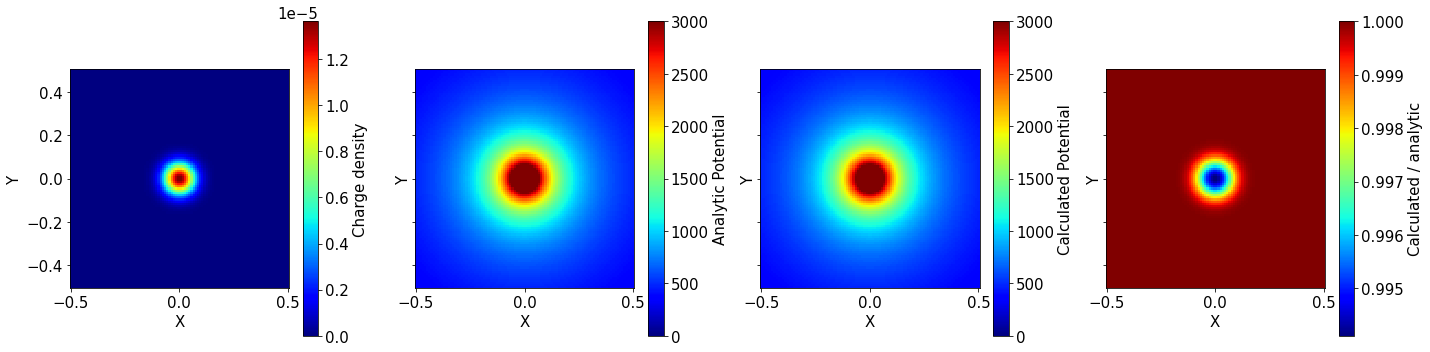

In [6]:
fs=15
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(20, 5), facecolor = 'white')
ax=axs[0]
C = rho[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet')#,vmin=1,vmax=4)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
cbar.set_label(label=r"Charge density",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=15)

ax=axs[1]
C = phi[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',vmin=0,vmax=3000)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
cbar.set_label(label=r"Analytic Potential",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=15)

ax=axs[2]
C = potential[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',vmin=0,vmax=3000)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
cbar.set_label(label=r"Calculated Potential",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=15)

ax=axs[3]
C = (potential/phi)[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet')#, vmin=0,vmax=100) # Plot the colormesh
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
cbar.set_label(label=r"Calculated / analytic",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=15)


fig.tight_layout()
plt.show()